# Seminar 1 - A Song of Graphs and Search

---

**Course**: Graphs and Network Analysis

**Degree**: Artificial Intelligence Degree (UAB)

**Topic**: Practical seminar that includes exercises from units 1 to 6

**Activity description**: Most of us are familiar with the Game of Thrones books or series. For those who do not know it, it is a fictional series from the HBO chain, inspired by the series of novels "A Song of Ice and Fire", which tells the experiences of a group of characters from different noble houses on the fictional continent of *Westeros* to have control of the Iron Throne and rule the seven kingdoms that make up the territory. The series' success has spawned many blogs and other sources about the series, with additional resources. The graphs that we propose to use in this exercise represent the characters of the series (or books) as nodes, and their co-appearance in a scene (the weights of the edges are higher if two characters appear simultaneously more times). So we have a social network of characters. We will use these graphs to work on some of the concepts seen in the first units of the course (graph and node metrics, search and routes). Finally, synthetic graphs that simulate a realistic network will be generated.

## Qualification

**Submission**: An '.ipynb' file from the colab corresponding to each group will be delivered (this very same file, adding the code blocks and explanations that correspond to each activity). To get the file you will need to go to File --> Download. Remember that you will have to answer and analyze the different problems. Coding alone will NOT be evaluated: explaining and reasoning about the solution of the problem is essential. **You should provide explanations of the obtained results for at least the exercises marked with the 💬 symbol**.
The outcome of this seminar will thus be an analysis of the network at different levels: global metrics, node importance, shortest paths, random graphs, and visualization.

**Delivery form**: The work must be done in **groups of two people** and delivered through the virtual campus (in the section corresponding to Seminar 1).

**Doubts**: For any questions, apart from class sessions, you can contact cristina.perez@uab.cat.

**Deadline**: March 13th (during all day).

**Marks**: The grade of the seminars (seminar 1 + seminar 2) has a weight of 10% on the final grade of the subject.


# Authors

**Lab group:** GrupLab-9

**Student 1 - Name (NIU): 1668936**

**Student 2 - Name (NIU):**

## 1. Environment setup
----

The main libraries that will be used in this seminar are the following:

* [NetworkX](https://networkx.github.io/)
* [Pandas](https://pandas.pydata.org/)
* [Matplotlib](https://matplotlib.org/)
* [NumPy](https://numpy.org/)



In [1]:
!pip install --upgrade scipy networkx

  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl (46.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [2]:
!pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [49 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-310\pygraphviz
      creating build\lib.win-amd64-cpython-310\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-310\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

## 2. Data collection

---

This seminar is based on data from *Game of Thrones* and "A Song of Ice and Fire" curated by Andrew Beveridge. Data is available from two different github repositories:

* [Book to Network](https://github.com/mathbeveridge/asoiaf)
* [Script to Network](https://github.com/mathbeveridge/gameofthrones)

In each of them, there is a *data* folder with several *.csv* files that encode nodes and edges of different networks.

To download the data in the *colab* environment you can run the following command:

```
$ !wget https://raw.githubusercontent.com/mathbeveridge/repo_name/master/data/file_id-nodes.csv
$ !wget https://raw.githubusercontent.com/mathbeveridge/repo_name/master/data/file_id-edges.csv
```


where,

* **repo_name** is the name of the repository, *asoiaf* for the Books and *gameofthrones* for the Script.
* **file_id** is the ID of the file you can find with the link. This indicates the book or season number.

For example, to download the graph of the first season of the series, we would run:

```
$ !wget https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-nodes.csv
$ !wget https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-edges.csv
```

The downloaded files can be found in */content/file_name*.

For this activity, we will work with the graph generated from all the books.


*  **Download the two .csv files corresponding to the graph generated from all the books (asoiaf-all)**.

In [8]:
!wget https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-nodes.csv
!wget https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s1-edges.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## 3. Data load

---

The function *csv_to_graph()* creates a NetworkX graph from the *.csv* files encoding edges and nodes.

In [2]:
def csv_to_graph(file_id_nodes: str, file_id_edges: str, origin: str = 'book') \
                    -> nx.graph:
    """Return a nx.graph

    Build a graph given a csv file for nodes and edge.
    origin controls the source of the graph to adapt the node features.
    """

    if origin == 'book':
        key1, key2 = 'weight', 'book'
    elif origin == 'script':
        key1, key2 = 'Weight', 'Season'
    else:
        raise NameError('Unknown origin {}'.format(origin))

    nodes = pd.read_csv(file_id_nodes)
    edges = pd.read_csv(file_id_edges)

    if key2 not in edges:
        key2 = 'id'

    g = nx.Graph()
    for row in nodes.iterrows():
        g.add_node(row[1]['Id'], name=row[1]['Label'])

    for row in edges.iterrows():
        g.add_edge(row[1]['Source'],row[1]['Target'],
                   weight=1/row[1][key1], id=row[1][key2])

    return g


* **Create a NetworkX graph from the downloaded files using the `csv_to_graph` function.** [Optionally, you can repeat the process with the graph generated from the series]

In [3]:
g_book = csv_to_graph('asoiaf-all-nodes.csv', 'asoiaf-all-edges.csv', origin='book')

* **Generate a first exploratory visualization of the graph.**

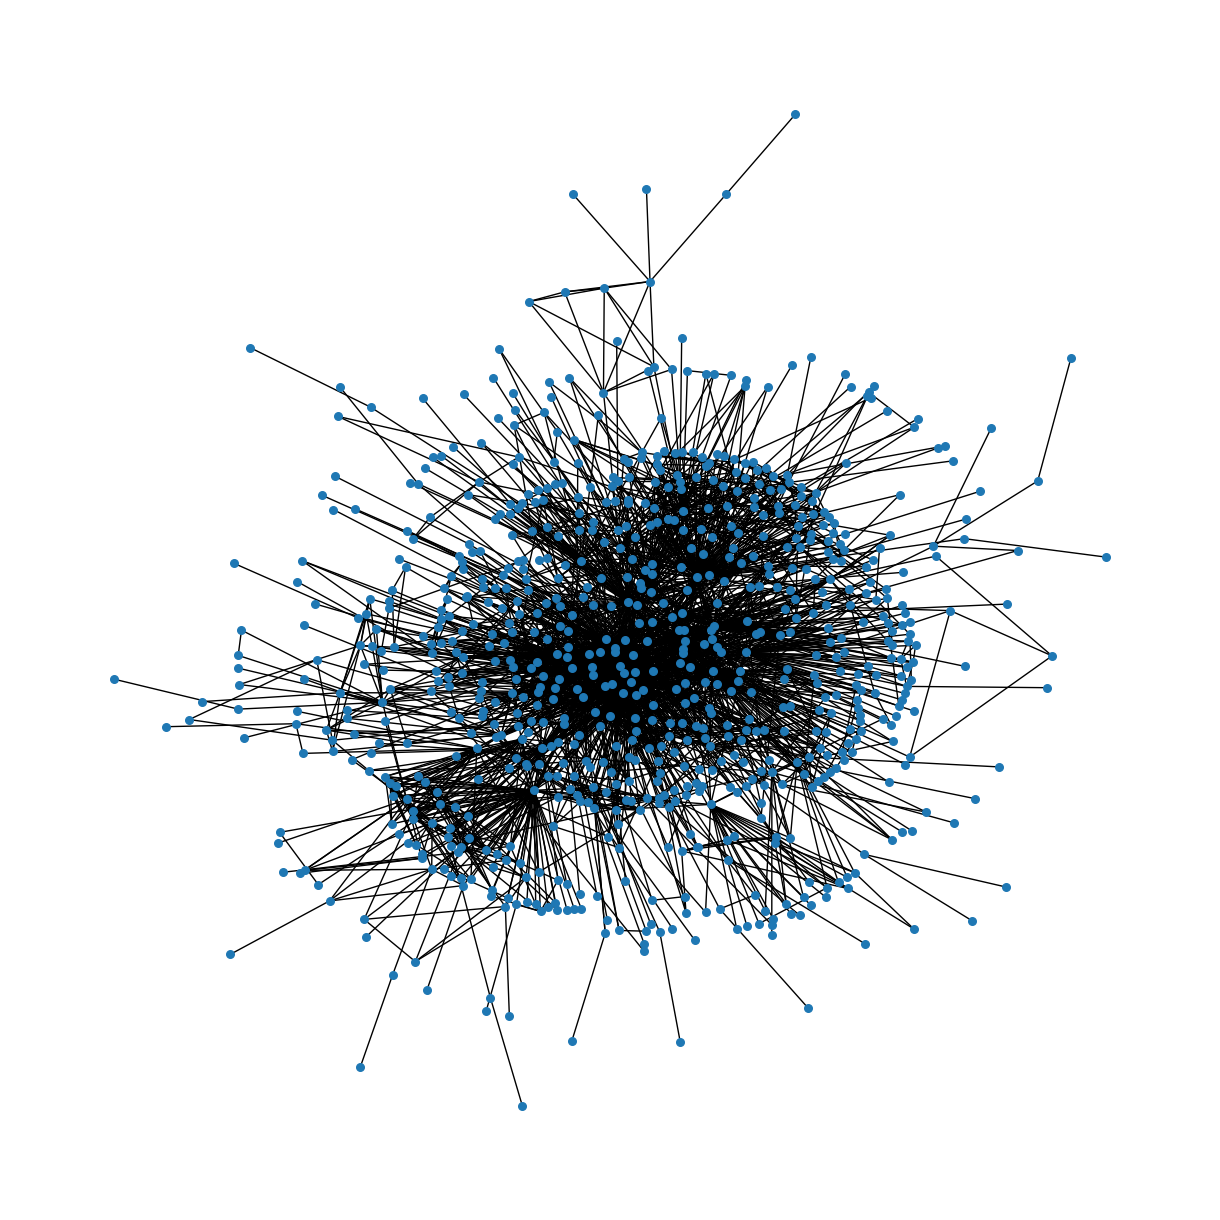

In [47]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100

pos = graphviz_layout(g_book, prog="neato")
nx.draw(g_book, pos, with_labels=False, arrows=False, node_size=30)
plt.show()

## 4. General graph metrics
---

Perform a general summary of the Network properties.

* **💬  Obtain the order, size and density of the graph, as well as the average degree of its nodes.**


In [50]:
graph_order = g_book.order()
graph_size = g_book.size()
graph_density = nx.density(g_book)
average_degree = np.mean(list(dict(g_book.degree()).values()))
print('Order:', graph_order)
print('Size:', graph_size)
print('Density:', graph_density)
print('Average degree:', average_degree)

Order: 796
Size: 2823
Density: 0.008921968332227173
Average degree: 7.092964824120603


💬 :

* **Check that it is a connected undirected graph.**

In [52]:
# check that is a connected undirected graph
print('Is connected:', nx.is_connected(g_book))
print('Is undirected:', not nx.is_directed(g_book))

Is connected: True
Is undirected: True


* **💬 Make a small report on the metrics of the given graph (diameter, radius, average network distance, clustering coefficient).**

In [53]:
print("diameter:", nx.diameter(g_book))
print("radius:", nx.radius(g_book))
print("average network distance:", nx.average_shortest_path_length(g_book))
print("average clustering coefficient:", nx.average_clustering(g_book))

diameter: 9
radius: 5
average network distance: 3.416225783003066
average clustering coefficient: 0.4858622073350485


💬 :

## 5. Centrality metrics: Characters' importance
---


In this section, we will study the importance of the characters according to their centrality in the graph.

* **Compute the 10 most central nodes in the network taking into account the different types of centrality (degree, betweenness, closeness and eigenvector centrality). Moreover, use page rank to assess importance of the characters.**

  * *centrality_bar_plot()*: Given the corresponding centrality draw a bar graph.
  * 💬 Try to reason about the changes that occur with the different types of centrality.

In [54]:
import matplotlib.pyplot as plt
def centrality_bar_plot(centrality, name='betweenness', n=10):
    # take the top n nodes by quantity of centrality
    centrality = dict(Counter(centrality).most_common(n))
    values = list(centrality.values())
    label = list(centrality.keys())

    df = pd.DataFrame({'Name': label, name: values})
    ax = df.plot.bar(x='Name', y=name, rot=90)

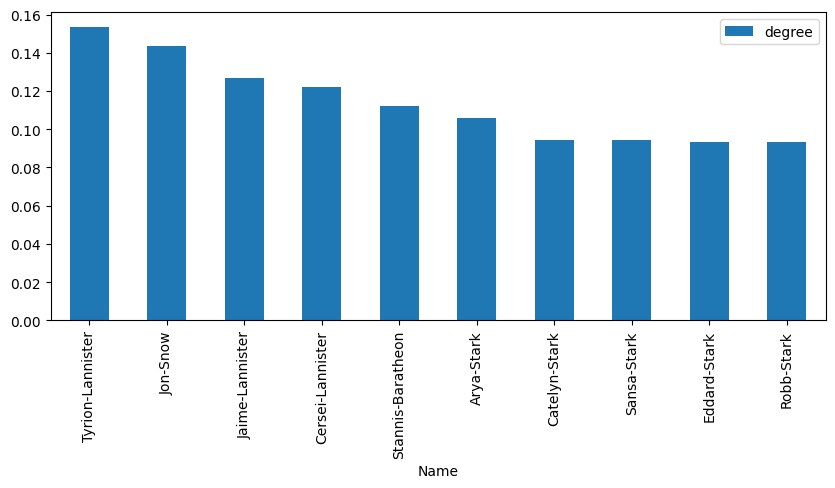

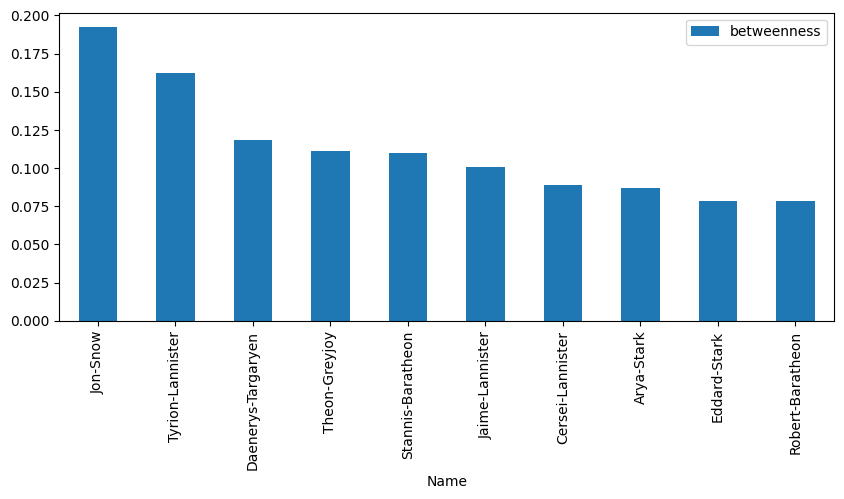

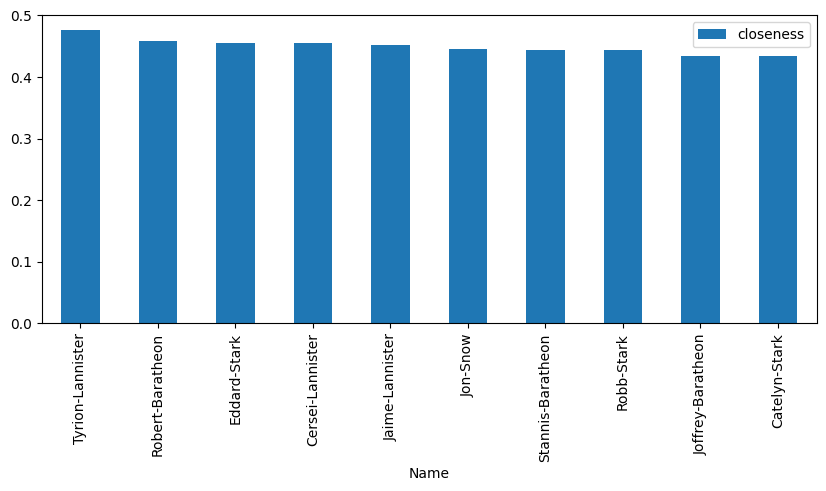

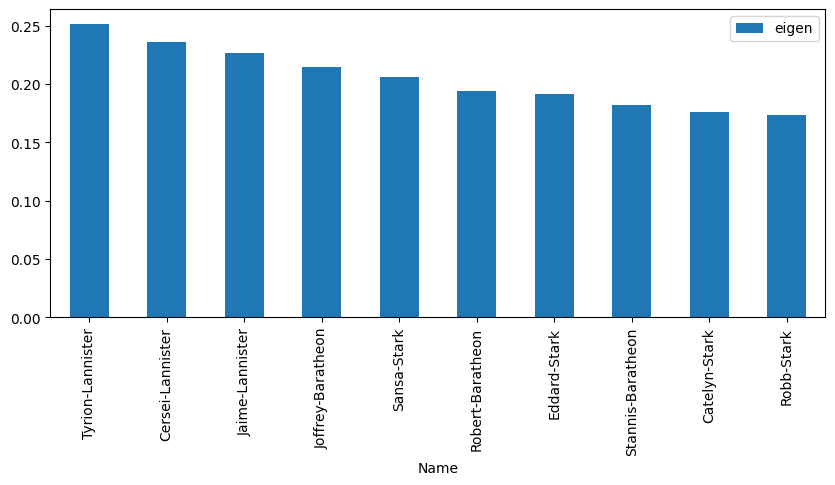

In [55]:
plt.rcParams['figure.figsize'] = [10, 4]

degree_centrality = nx.degree_centrality(g_book) # Degree Centrality
betweenness_centrality = nx.betweenness_centrality(g_book) # Betweenness Centrality
closeness_centrality = nx.closeness_centrality(g_book) # Closeness Centrality
eigen_centrality = nx.eigenvector_centrality(g_book) # Eigenvector Centrality


centrality_bar_plot(degree_centrality, name='degree')
centrality_bar_plot(betweenness_centrality, name='betweenness')
centrality_bar_plot(closeness_centrality, name='closeness')
centrality_bar_plot(eigen_centrality, name='eigen')

plt.rcParams['figure.figsize'] = [12, 12]

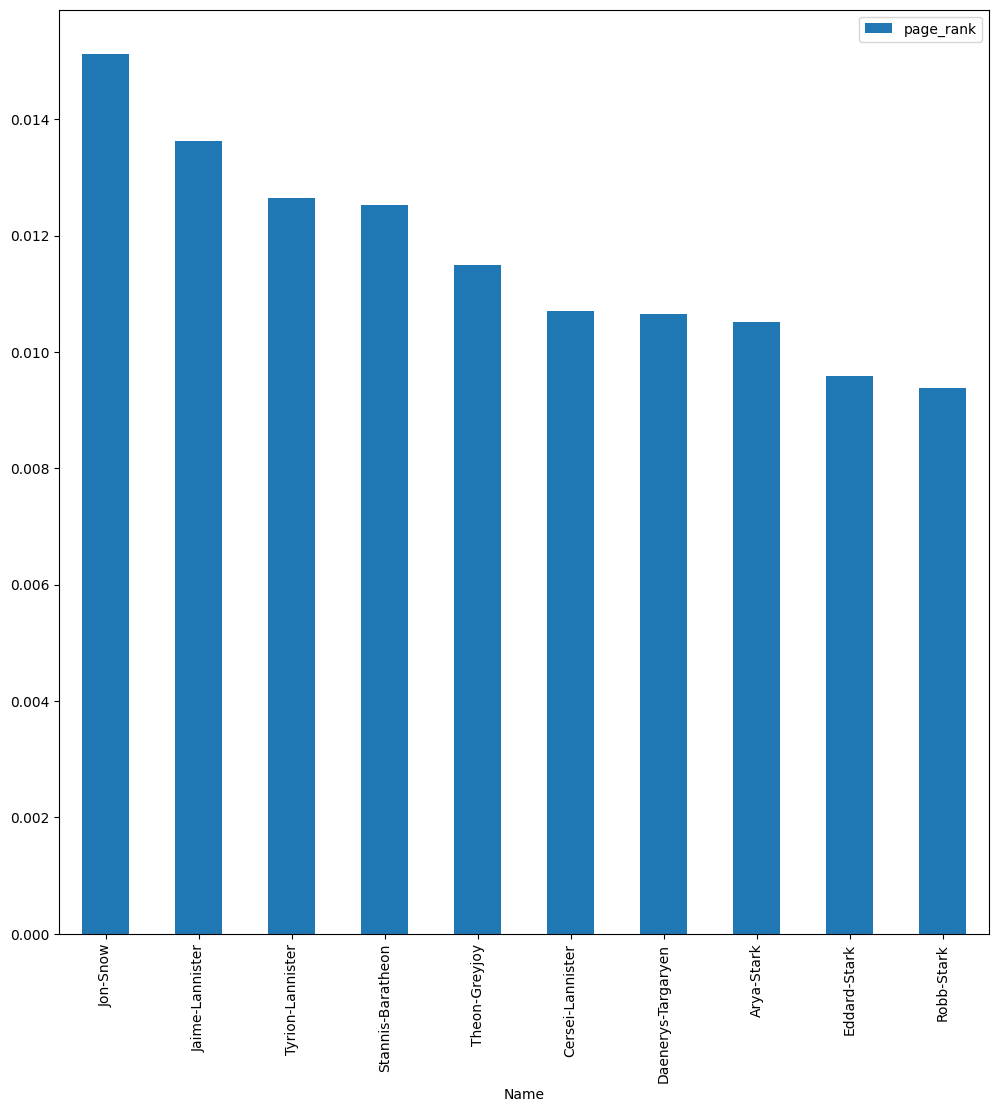

In [56]:
# Page rank to assess the importance of the characters
page_rank = nx.pagerank(g_book)
centrality_bar_plot(page_rank, name='page_rank')

plt.show()

💬 : In the closeness centrality there doesn't seem to be a significant difference out of the top 10 nodes. The measure shows when a node is near the center of the network, so all other nodes have a very similar value because they're really close to the center.

In the betweenness centrality bar plot, we can visualize a gradual difference in value for the nodes. We start with a node that has a really high value (the center) and clearly the node is relevant in the information flow since it's the one that brokers between groups the most. As we reach for the neighbors of this node, this value decreases because we're incrementing the distance between the highest node and the others.

As for the degree centrality, the plot shows also a gradual decrease, which is normal because all 10 nodes don't hold the same importance in the graph as we see that their connections decrease as we go through each node. This is an usual pattern in the context of social networks when the node that has the most followers is the most important while the rest have more or less an average number of followers which is usually much more lower.

In the eigenvector centrality, we see the same pattern, the latter nodes are connected to less important nodes and have a lower degree centrality, while the highest are connected to more influential nodes. As we go through the nodes we notice a decrease in this number.

In page rank, we have more or less the same as in the degree centrality.

* **What is the subgraph generated by the best connected characters?**
  * Use closeness centrality to generate the graph of the 25 most central characters.

In [57]:
def centrality_subgraph(g, centrality, name='closeness', n=25):
    # take the top n nodes by quantity of centrality
    centrality = dict(Counter(centrality).most_common(n))
    nodes = list(centrality.keys())
    sg = g.subgraph(nodes)
    plt.title('Top {} nodes by {}'.format(n, name))
    pos = graphviz_layout(sg, prog="neato")
    nx.draw(sg, pos, with_labels=True, arrows=False, node_size=30)
    plt.show()

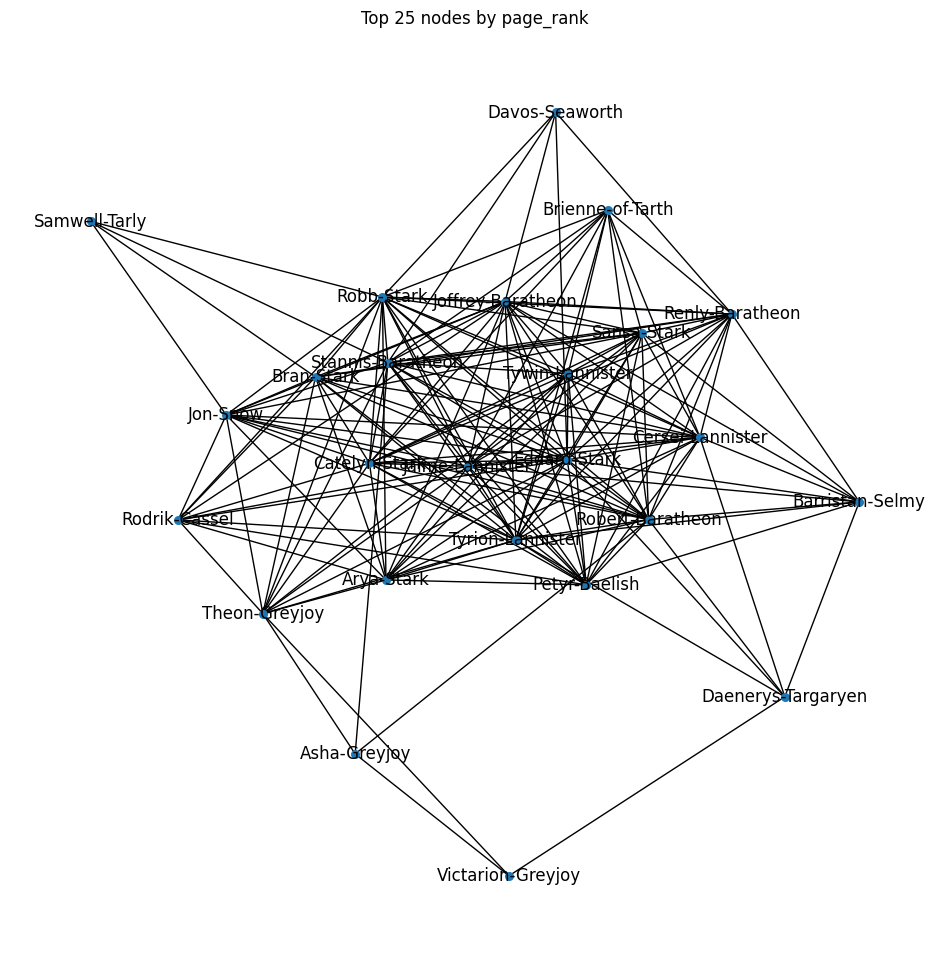

In [58]:
g_subgraph = centrality_subgraph(g_book, page_rank, name='page_rank', n=25)

* **Draw this subgraph where the nodes are of size proportional to their centrality. Mark the most central and the less central node in the graph (for instance, use the color of the node to highlight it).**
  * Use *closeness centrality* and scale it appropriately to emphasize the importance of different nodes.

* **Draw the tree that the BFS and DFS algorithm would generate to traverse the graph starting from the least central node of the network according to *closeness centrality*.**
  * Use *closeness centrality* and scale it appropriately to emphasize the importance of different nodes.
  * To get the positions of the nodes, you can use the `graphviz_layout(tree, prog='dot')` command.
  * 💬 Comment on the obtained result.


In [ ]:
tree = ...

pos = graphviz_layout(..., prog='dot')

In [ ]:
tree = ...

pos = graphviz_layout(tree, prog='dot')

💬 :

* **💬 Compute the shortest path between the least and the most central nodes in the complete graph.**

💬 :

## 6. Random graph models
----
Up to this point, we have worked with a graph generated from the data extracted from the *Song of Ice and Fire* books. In the real world, however, obtaining the data needed to construct this graph can become very complex and expensive. This is one of the reasons why, over time, the synthetic generation of graphs has been studied.

In this section we will work on the different models described in class. We will generate random graphs and study their properties.

* **Generate random graphs with the Uniform, Gilbert and Barabási-Albert models. Fix the number of nodes to the order of the studied graph. Adjust the rest of the parameters of the graph generation function to obtain graphs with similar number of edges.**

In [30]:
nedges = g_book.number_of_edges()
nnodes = g_book.number_of_nodes()
seed = 42
print(nnodes, nedges)

796 2823


### Erdös-Rény: Uniform Model (gnm)

In [31]:
g_uniform = nx.gnm_random_graph(nnodes, nedges, seed=seed)
print(g_uniform.number_of_nodes(), g_uniform.number_of_edges())

796 2823


### Erdös-Rény: Gilbert Model (gnp)


In [32]:
total_edges = nnodes*(nnodes-1)/2
g_gilbert = nx.gnp_random_graph(nnodes, p=nedges/total_edges, seed=seed)
print(g_gilbert.number_of_nodes(), g_gilbert.number_of_edges())

796 2872


### Barabási-Albert Model



In [33]:
# we compute m
g_barbasi = nx.barabasi_albert_graph(n=nnodes, m=4, seed=seed)
print(g_barbasi.number_of_nodes(), g_barbasi.number_of_edges())

796 3168


In [34]:
g_dict = {'Book': g_book, 'Uniform': g_uniform, 'Erdos': g_gilbert, 'Barbasi': g_barbasi}

* **💬 Show the order and size of the graph as well as the average degree and clustering coefficient of its nodes. Compute also the intervals between the maximum and minimum centralities for each family of synthetic graphs. Make a small report of the main metrics. Which random graph resembles more closely the graph from the books?**
     * You can set the graph generation using a random seed. This way, two different runs will generate exactly the same graph.

In [35]:
for k, g in g_dict.items():
	print("------", k, "------")
	print("Order of: {}".format(g.order()))
	print("Size of: {}".format(g.size()))
	print("Average degree of: {}".format(np.mean(list(dict(g.degree()).values()))))
	print("Average clustering coefficient: {}".format(nx.average_clustering(g)))

------ Book ------
Order of: 796
Size of: 2823
Average degree of: 7.092964824120603
Average clustering coefficient: 0.4858622073350485
------ Uniform ------
Order of: 796
Size of: 2823
Average degree of: 7.092964824120603
Average clustering coefficient: 0.006905454958218769
------ Erdos ------
Order of: 796
Size of: 2872
Average degree of: 7.21608040201005
Average clustering coefficient: 0.010638102126795586
------ Barbasi ------
Order of: 796
Size of: 3168
Average degree of: 7.959798994974874
Average clustering coefficient: 0.039159132284130795


In [36]:
for k, g in g_dict.items():
	deg_centrality = nx.degree_centrality(g)
	max_dc = max(deg_centrality, key=deg_centrality.get)
	min_dc = min(deg_centrality, key=deg_centrality.get)
	bet_centrality = nx.betweenness_centrality(g)
	max_bc = max(bet_centrality, key=bet_centrality.get)
	min_bc = min(bet_centrality, key=bet_centrality.get)
	cl_centrality = nx.closeness_centrality(g)
	max_clc = max(cl_centrality, key=cl_centrality.get)
	min_clc = min(cl_centrality, key=cl_centrality.get)
	eig_centrality = nx.eigenvector_centrality(g)
	max_ec = max(eig_centrality, key=eig_centrality.get)
	min_ec = min(eig_centrality, key=eig_centrality.get)

	print("------", k, "------")
	print("Interval of degree centrality: [{}, {}]".format(deg_centrality[min_dc], deg_centrality[max_dc]))
	print("Interval of betweenness centrality: [{}, {}]".format(bet_centrality[min_bc], bet_centrality[max_bc]))
	print("Interval of closeness centrality: [{}, {}]".format(cl_centrality[min_clc], cl_centrality[max_clc]))
	print("Interval of eigenvector centrality: [{}, {}]".format(eig_centrality[min_ec], eig_centrality[max_ec]))

------ Book ------
Interval of degree centrality: [0.0012578616352201257, 0.15345911949685534]
Interval of betweenness centrality: [0.0, 0.19211961968354507]
Interval of closeness centrality: [0.15051117001135933, 0.4763331336129419]
Interval of eigenvector centrality: [2.148364527641834e-07, 0.25155836369082]
------ Uniform ------
Interval of degree centrality: [0.0012578616352201257, 0.021383647798742137]
Interval of betweenness centrality: [0.0, 0.01656334703624849]
Interval of closeness centrality: [0.19161243673174258, 0.3162291169451074]
Interval of eigenvector centrality: [0.0011435501255364104, 0.08715473081538332]
------ Erdos ------
Interval of degree centrality: [0.0012578616352201257, 0.021383647798742137]
Interval of betweenness centrality: [0.0, 0.015722091620880924]
Interval of closeness centrality: [0.22095608671484157, 0.32515337423312884]
Interval of eigenvector centrality: [0.003961798993422594, 0.09961260641866543]
------ Barbasi ------
Interval of degree centrality

💬 : The random grah that reassembles the most the book graph is the **Barbasi**. Overall, it is the one whose metrics approximate more the book graph, with some exceptions like the minimum degree centrality, which others approximate more.

* **💬 Check whether the networks (the three randomly generated ones and the network extracted from the books) follow a Power Law.**

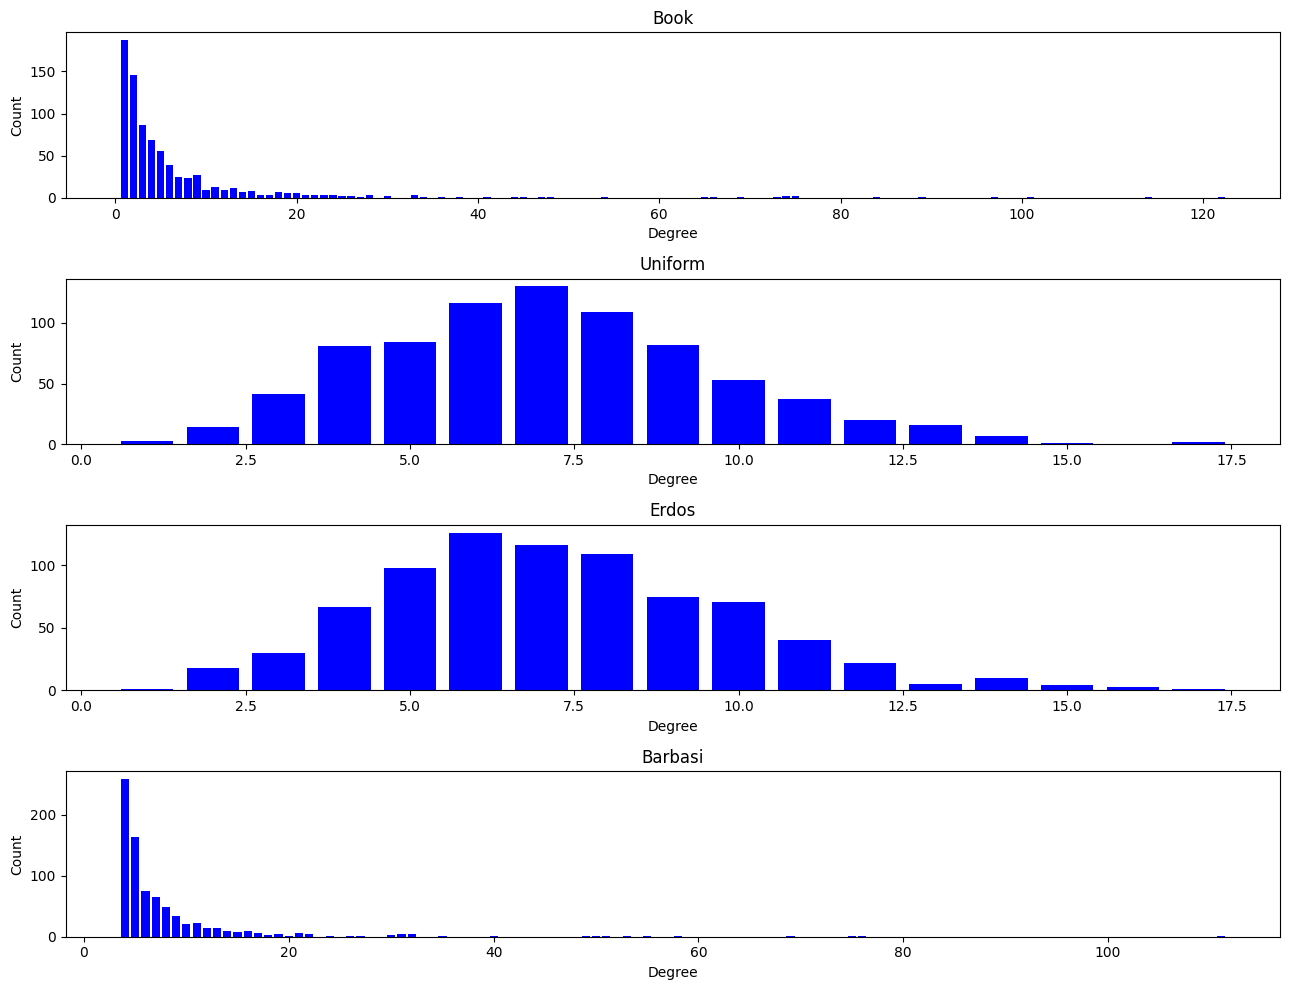

In [48]:
plt.rcParams['figure.figsize'] = [13, 10]

# check power law
fig, ax = plt.subplots(4, 1)
for i, (k, g) in enumerate(g_dict.items()):
	degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
	degreeCount = {i: degree_sequence.count(i) for i in degree_sequence}
	deg, count = zip(*degreeCount.items())
	ax[i].bar(deg, count, width=0.80, color='b')
	ax[i].set_title(k)
	ax[i].set_xlabel('Degree')
	ax[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

💬 : Only the Barbasi random graph follows a Power-law distribution, like the original graph from the book.